<a href="https://colab.research.google.com/github/atul2110/Sales-Analytics/blob/main/advertising_ml_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementation by Multiple Linear Regression


In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading Data
df=pd.read_csv("advertising.csv")
print(df.head(5))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [3]:
# check for null value
print(df.isnull())

        TV  Radio  Newspaper  Sales
0    False  False      False  False
1    False  False      False  False
2    False  False      False  False
3    False  False      False  False
4    False  False      False  False
..     ...    ...        ...    ...
195  False  False      False  False
196  False  False      False  False
197  False  False      False  False
198  False  False      False  False
199  False  False      False  False

[200 rows x 4 columns]


In [4]:
# check for how many null value each attribute have
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
# check mean count std etc.
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
# Correlation matrix
print(df.corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


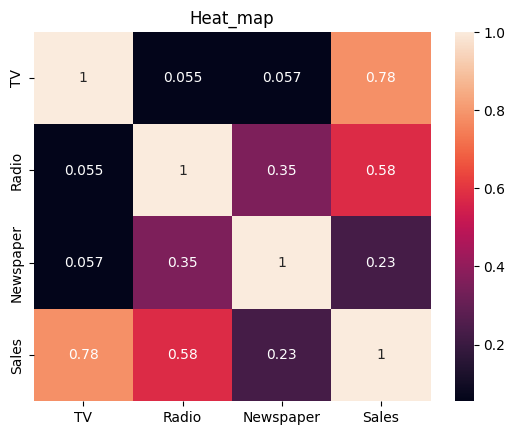

In [7]:
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.title("Heat_map")
plt.show()

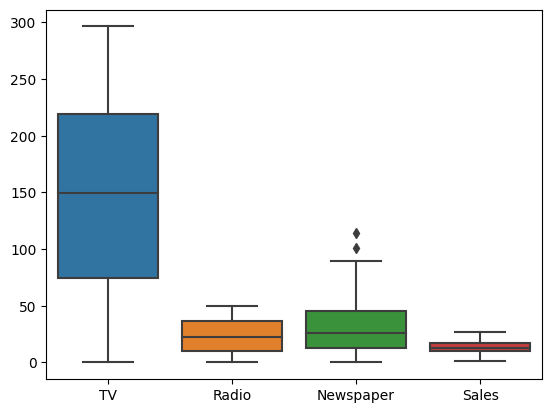

In [8]:
# check for outlier
sns.boxplot(data=df)
plt.show()

In [9]:
# splitting data in training and testing set
output_col="sales"
x_full=df.iloc[:,0:3]
print(x_full.head(5))
print("-----------------")
y_full=df.loc[:,'Sales']
# y_full can also we generated by y_full=df.iloc[:,-1]
# y_full=df.iloc[:,-1]
print(y_full.head(5))
x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,test_size=0.30,random_state=43)
print(f"Shape of test data {x_test.shape}")

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
-----------------
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
Shape of test data (60, 3)


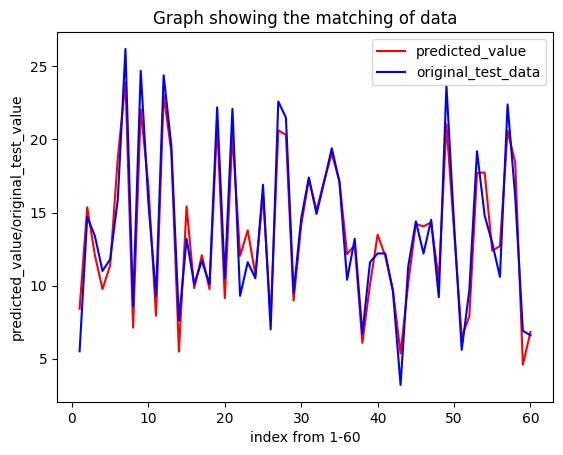

In [10]:
# Applying Multiple Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test);
index=[i for i in range(1,61)]
plt.plot(index,prediction,label="predicted_value",color="red")
plt.plot(index,y_test,label="original_test_data",color="blue")
plt.xlabel("index from 1-60")
plt.ylabel("predicted_value/original_test_value")
plt.title("Graph showing the matching of data")
plt.legend()
plt.show()

In [11]:
# finding R2 score
print(f"r2 score of the model is {r2_score(y_test,prediction)}")

r2 score of the model is 0.9220854203535253
